# ИУ5-61Б Головацкий А. Д. РК №1

<a id='0'></a>
# Оглавление

1. [Задание](#1)<br>
2. [Описание датасета](#2)<br>
3. [Импорт библиотек](#3)<br>
4. [Загрузка и первичный анализ данных](#4)<br>
5. [Диаграмма рассеяния для двух стобцов](#5)<br>
6. [Обработка пропусков в данных](#6)<br>

<a id="1"></a>
# Задание ([к оглавлению](#0))

>Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

>Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

>Необходимо подготовить отчет по рубежному контролю и разместить его в Вашем репозитории. Вы можете использовать титульный лист, или в начале ноутбука в текстовой ячейке указать Ваши Ф.И.О. и группу.

<a id="2"></a>
# Описание датасета ([к оглавлению](#0))

Датасет `FIFA 19 complete player dataset` создан для футбольной аналитики. Он содержит подробные атрибуты каждого игрока, зарегистрированного в базе данных FIFA 19.

<a id="3"></a>
# Импорт библиотек ([к оглавлению](#0))

In [24]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline

<a id="4"></a>
# Загрузка и первичный анализ данных ([к оглавлению](#0))

In [25]:
data = pd.read_csv("C:\\Users\\Andrew\\Desktop\\ML-2022\\datasets\\data.csv", sep=",")
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [26]:
# Переименуем столбцы, чтобы избавиться от пробелов в именах
data = data.rename(columns={
    "Club Logo": "ClubLogo",
    "Preferred Foot": "PreferredFoot",
    "International Reputation": "InternationalReputation",
    "Weak Foot": "WeakFoot",
    "Skill Moves": "SkillMoves",
    "Work Rate": "WorkRate",
    "Body Type": "BodyType",
    "Real Face": "RealFace",
    "Jersey Number": "JerseyNumber",
    "Loaned From": "LoanedFrom",
    "Contract Valid Until": "ContractValidUntil",
    "Release Clause": "ReleaseClause",
})

In [27]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,InternationalReputation,WeakFoot,SkillMoves,JerseyNumber,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [28]:
data.shape

(18207, 89)

In [29]:
data.dtypes

Unnamed: 0         int64
ID                 int64
Name              object
Age                int64
Photo             object
                  ...   
GKHandling       float64
GKKicking        float64
GKPositioning    float64
GKReflexes       float64
ReleaseClause     object
Length: 89, dtype: object

In [30]:
# Количество пустых значений
total_count = data.shape[0]
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    temp_perc = round((temp_null_count / total_count) * 100.0, 2)
    print('Колонка {} – {}, {}%'.format(col, temp_null_count, temp_perc))    

Колонка Unnamed: 0 – 0, 0.0%
Колонка ID – 0, 0.0%
Колонка Name – 0, 0.0%
Колонка Age – 0, 0.0%
Колонка Photo – 0, 0.0%
Колонка Nationality – 0, 0.0%
Колонка Flag – 0, 0.0%
Колонка Overall – 0, 0.0%
Колонка Potential – 0, 0.0%
Колонка Club – 241, 1.32%
Колонка ClubLogo – 0, 0.0%
Колонка Value – 0, 0.0%
Колонка Wage – 0, 0.0%
Колонка Special – 0, 0.0%
Колонка PreferredFoot – 48, 0.26%
Колонка InternationalReputation – 48, 0.26%
Колонка WeakFoot – 48, 0.26%
Колонка SkillMoves – 48, 0.26%
Колонка WorkRate – 48, 0.26%
Колонка BodyType – 48, 0.26%
Колонка RealFace – 48, 0.26%
Колонка Position – 60, 0.33%
Колонка JerseyNumber – 60, 0.33%
Колонка Joined – 1553, 8.53%
Колонка LoanedFrom – 16943, 93.06%
Колонка ContractValidUntil – 289, 1.59%
Колонка Height – 48, 0.26%
Колонка Weight – 48, 0.26%
Колонка LS – 2085, 11.45%
Колонка ST – 2085, 11.45%
Колонка RS – 2085, 11.45%
Колонка LW – 2085, 11.45%
Колонка LF – 2085, 11.45%
Колонка CF – 2085, 11.45%
Колонка RF – 2085, 11.45%
Колонка RW – 2085, 11

Проводя визуализацию данных, я бы удалил столбец LoanedFrom, который имеет более 93% пустых значений и к тому же является не очень информативным, а также столбец Unnamed, по сути реализующий лишнюю индексацию элементов.

In [31]:
# df = data.drop('LoanedFrom', axis=1)
# df = data.drop('Unnamed', axis=1)

<a id="5"></a>
# Диаграмма рассеяния для двух стобцов ([к оглавлению](#0))

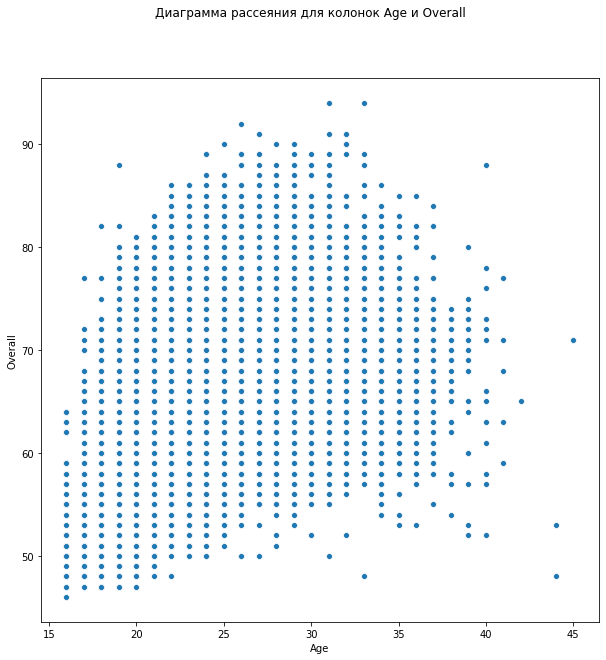

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle("Диаграмма рассеяния для колонок Age и Overall")
sns.scatterplot(ax=ax, x='Age', y='Overall', data=data)

<a id="6"></a>
# Обработка пропусков в данных ([к оглавлению](#0))

### Количественный признак

In [33]:
# Импьютация столбца JerseyNumber с помощью медианы

temp_col = SimpleImputer(strategy='median').fit_transform(data[['JerseyNumber']])
data[['JerseyNumber']] = temp_col

### Категориальный признак

In [34]:
# Импьютация константой NA столбца LS

temp_col = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA').fit_transform(data[['LS']])
data[['LS']] = temp_col

# Количество пустых значений
total_count = data.shape[0]
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    temp_perc = round((temp_null_count / total_count) * 100.0, 2)
    print('Колонка {} – {}, {}%'.format(col, temp_null_count, temp_perc))    

Колонка Unnamed: 0 – 0, 0.0%
Колонка ID – 0, 0.0%
Колонка Name – 0, 0.0%
Колонка Age – 0, 0.0%
Колонка Photo – 0, 0.0%
Колонка Nationality – 0, 0.0%
Колонка Flag – 0, 0.0%
Колонка Overall – 0, 0.0%
Колонка Potential – 0, 0.0%
Колонка Club – 241, 1.32%
Колонка ClubLogo – 0, 0.0%
Колонка Value – 0, 0.0%
Колонка Wage – 0, 0.0%
Колонка Special – 0, 0.0%
Колонка PreferredFoot – 48, 0.26%
Колонка InternationalReputation – 48, 0.26%
Колонка WeakFoot – 48, 0.26%
Колонка SkillMoves – 48, 0.26%
Колонка WorkRate – 48, 0.26%
Колонка BodyType – 48, 0.26%
Колонка RealFace – 48, 0.26%
Колонка Position – 60, 0.33%
Колонка JerseyNumber – 0, 0.0%
Колонка Joined – 1553, 8.53%
Колонка LoanedFrom – 16943, 93.06%
Колонка ContractValidUntil – 289, 1.59%
Колонка Height – 48, 0.26%
Колонка Weight – 48, 0.26%
Колонка LS – 0, 0.0%
Колонка ST – 2085, 11.45%
Колонка RS – 2085, 11.45%
Колонка LW – 2085, 11.45%
Колонка LF – 2085, 11.45%
Колонка CF – 2085, 11.45%
Колонка RF – 2085, 11.45%
Колонка RW – 2085, 11.45%
Ко

### Ответы

Для обработки пропусков категориальных признаков использовалась замена константой. Для количественных признаков использовалась замена медианой.

В дальнейшем для построения моделей следует исключить из датасета признаки Unnamed и LonedFrom, т.к. столбец Unnamed реализует ненужную индексацию, а столбец LonedFrom в большинстве своем представляет пустые значения, что делает его неинформативным. Остальные признаки можно учитывать, они могут оказать большое влияние, большинство из них являются строковыми.